# Plot with Pandas

Examples on how to plot with pandas 

## Way 1. Pivot

In [246]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [247]:
# Create the indexes
n = 10
time_step = 100
index =sorted(list(range(n))*time_step)
time = list(np.linspace(0,1,time_step))*n

In [248]:
# Create positions
x_pos = np.random.randn(1000)

In [249]:
df = pd.DataFrame({'veh_id': index,'t': time,'x': x_pos})

In [252]:
df.head(20)

,t,veh_id,x
0,0.000000,0,1.087557
1,0.010101,0,-0.469005
2,0.020202,0,0.234424
3,0.030303,0,-0.069933
4,0.040404,0,-1.002962
5,0.050505,0,0.571244
6,0.060606,0,-0.829837
7,0.070707,0,-0.820239
8,0.080808,0,-0.903923
9,0.090909,0,1.062645


In [253]:
df.shape

(1000, 3)

In [254]:
# Promoting time as an index
indexed_df = df.set_index(['t'])
indexed_df.head(5)

,veh_id,x
t,,
0.000000,0,1.087557
0.010101,0,-0.469005
0.020202,0,0.234424
0.030303,0,-0.069933
0.040404,0,-1.002962


In [255]:
# Change positions into columns
pivoted = df.pivot(index='t', columns='veh_id', values='x')
pivoted.head(4)

veh_id,0,1,2,3,4,5,6,7,8,9
t,,,,,,,,,,
0.000000,1.087557,0.885457,-1.142287,0.496492,0.466400,0.592274,0.051224,0.746692,-1.479473,0.628324
0.010101,-0.469005,-0.059731,0.561381,0.905725,-0.545207,0.114945,0.213513,-0.251449,0.232953,-1.213699
0.020202,0.234424,1.292259,-1.128525,-0.774747,-2.923452,-0.950921,0.711788,0.930134,-0.208767,1.496885
0.030303,-0.069933,-0.586097,0.141888,-0.121000,1.965139,0.147083,1.084449,-1.180869,-0.712040,0.020426


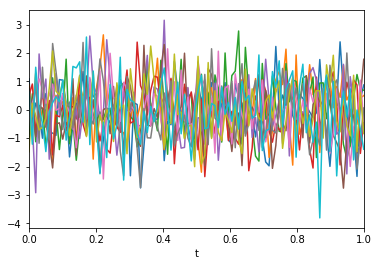

In [257]:
pivoted.plot(legend = False)

## Way 2: Group by

Use group by to plot, particularly good for data sets with different lengths.

veh_id
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

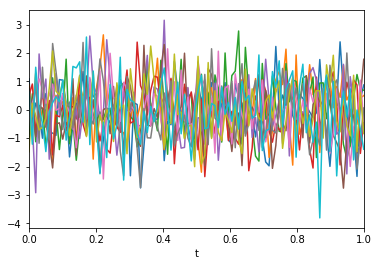

In [274]:
ax = df.plot()
ax.clear()
df.groupby(by='veh_id').plot(x='t',y='x',legend=False,ax = ax)